In [78]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
#import gc
#import tensorflow as tf

In [79]:
model = YOLO("./runs/detect/train73/weights/best.pt")
#model = YOLO("yolov8s.pt")
# load on NVIDIA GPU (do only if available)
model.to('cuda')

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_s

In [80]:
# define testing images
images = [
    './data/PKLot/PKLot/PUCPR/Rainy/2012-09-16/2012-09-16_07_32_58.jpg',
    './data/PKLot/PKLot/PUCPR/Rainy/2012-10-23/2012-10-23_08_15_50.jpg',
    './data/PKLot/PKLot/UFPR04/Rainy/2013-01-21/2013-01-21_10_25_05.jpg',
    './data/PKLot/PKLot/UFPR04/Rainy/2012-12-15/2012-12-15_16_30_13.jpg',
    './data/PKLot/PKLot/UFPR05/Rainy/2013-03-16/2013-03-16_16_40_12.jpg',
    './data/PKLot/PKLot/UFPR05/Rainy/2013-03-20/2013-03-20_18_10_14.jpg',
    './data/unseen_test/test1.jpg',
    './data/unseen_test/test2.jpg',
    './data/unseen_test/test3.jpg',
    './data/unseen_test/test4.jpg',
    './data/unseen_test/test5.jpg',
    './data/unseen_test/test6.jpg'
]


In [81]:
def predict(image_path):
    image = cv2.imread(image_path)

    # force model to use cpu even if trained on gpu with line 1 otherwise do prediction on 
    #results = model(image, conf=0.7, device='cpu') # [1, 2, 3, 5, 7], augment=True
    # results = model(image, conf=0.05, iou=0.25, classes=2) # [1, 2, 3, 5, 7], augment=True
    results = model(image, conf=0.05, iou=0.25, classes=1) # [1, 2, 3, 5, 7], augment=True
    return results[0]


In [82]:
def plot_results(result, image_path):
  image = cv2.imread(image_path)
  
  print(f'{len(result.boxes)} objects recognised')
  
  for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    if True: # class_id == 'car' or class_id == 'truck' or class_id == 'bus':
      cords = box.xyxy[0].tolist()
      cords = [round(x) for x in cords]
      conf = round(box.conf[0].item(), 2)
      # print("Object type:", class_id)
      # print("Coordinates:", cords)
      # print("Probability:", conf)
      # print("---")
      
      # Split coordinates
      x1, y1, x2, y2 = cords
      
      if class_id == 'empty':
        color = (0, 255, 0)
      else:
        color = (255, 0, 0)
      
      # Draw rectangle (bounding box)
      cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

      # Put class label on the rectangle
      cv2.putText(image, str(class_id), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
    
  # Save or display the image
  plt.imshow(image, aspect='auto')
  plt.show()  # Show the image

./data/PKLot/PKLot/PUCPR/Rainy/2012-09-16/2012-09-16_07_32_58.jpg

0: 384x640 (no detections), 31.5ms
Speed: 3.0ms preprocess, 31.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)
0 objects recognised


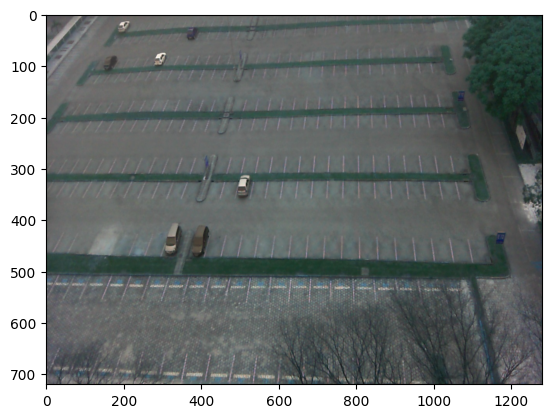

./data/PKLot/PKLot/PUCPR/Rainy/2012-10-23/2012-10-23_08_15_50.jpg

0: 384x640 (no detections), 17.7ms
Speed: 2.0ms preprocess, 17.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)
0 objects recognised


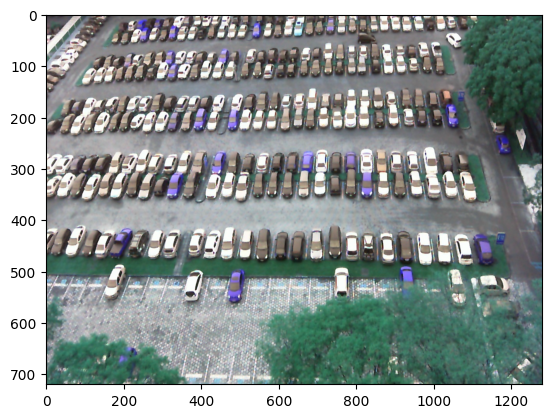

./data/PKLot/PKLot/UFPR04/Rainy/2013-01-21/2013-01-21_10_25_05.jpg

0: 384x640 (no detections), 18.1ms
Speed: 7.0ms preprocess, 18.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)
0 objects recognised


./data/PKLot/PKLot/UFPR04/Rainy/2012-12-15/2012-12-15_16_30_13.jpg

0: 384x640 (no detections), 16.9ms
Speed: 2.0ms preprocess, 16.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)
0 objects recognised


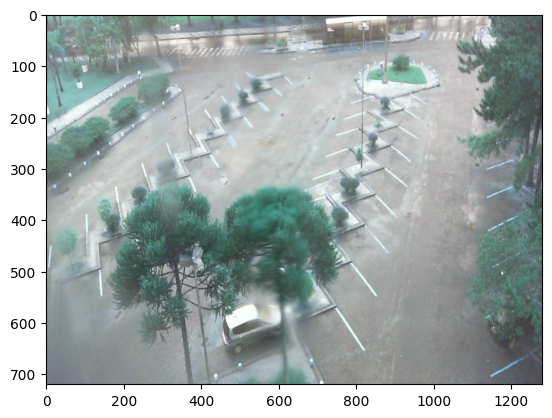

./data/PKLot/PKLot/UFPR05/Rainy/2013-03-16/2013-03-16_16_40_12.jpg

0: 384x640 (no detections), 47.0ms
Speed: 0.0ms preprocess, 47.0ms inference, 8.0ms postprocess per image at shape (1, 3, 384, 640)
0 objects recognised


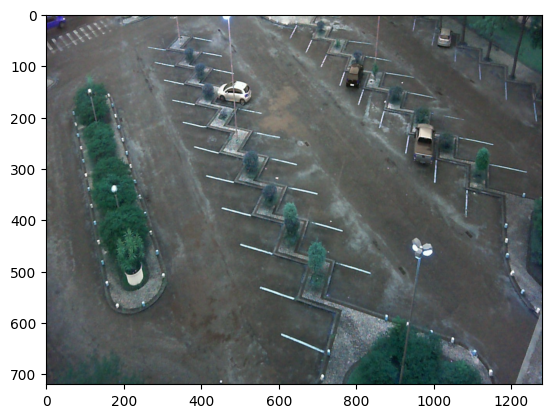

./data/PKLot/PKLot/UFPR05/Rainy/2013-03-20/2013-03-20_18_10_14.jpg

0: 384x640 (no detections), 55.9ms
Speed: 0.0ms preprocess, 55.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)
0 objects recognised


./data/unseen_test/test1.jpg

0: 384x640 (no detections), 61.6ms
Speed: 3.9ms preprocess, 61.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)
0 objects recognised


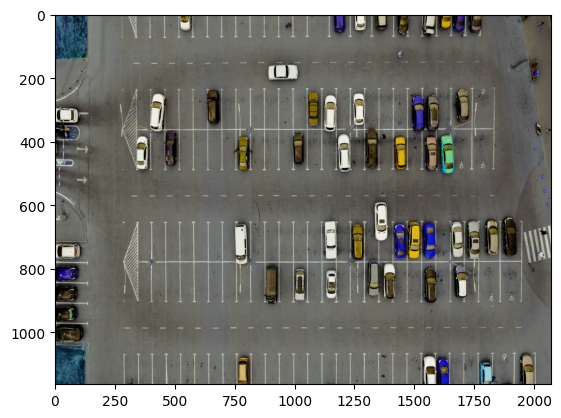

./data/unseen_test/test2.jpg

0: 416x640 (no detections), 44.4ms
Speed: 7.2ms preprocess, 44.4ms inference, 5.7ms postprocess per image at shape (1, 3, 416, 640)
0 objects recognised


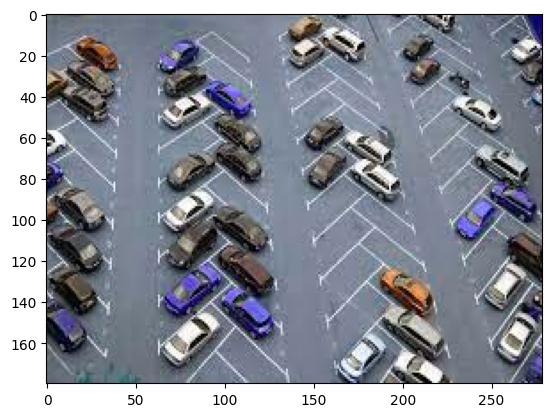

./data/unseen_test/test3.jpg

0: 416x640 (no detections), 50.5ms
Speed: 7.3ms preprocess, 50.5ms inference, 5.0ms postprocess per image at shape (1, 3, 416, 640)
0 objects recognised


./data/unseen_test/test4.jpg

0: 352x640 (no detections), 52.9ms
Speed: 0.0ms preprocess, 52.9ms inference, 4.0ms postprocess per image at shape (1, 3, 352, 640)
0 objects recognised


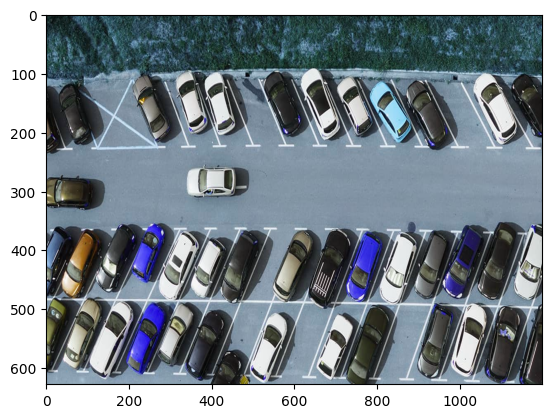

./data/unseen_test/test5.jpg

0: 448x640 (no detections), 78.5ms
Speed: 4.0ms preprocess, 78.5ms inference, 7.9ms postprocess per image at shape (1, 3, 448, 640)
0 objects recognised


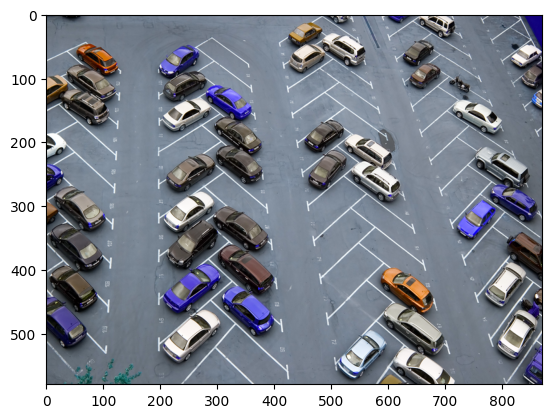

./data/unseen_test/test6.jpg

0: 448x640 (no detections), 51.3ms
Speed: 0.0ms preprocess, 51.3ms inference, 6.3ms postprocess per image at shape (1, 3, 448, 640)
0 objects recognised


In [83]:
for img in images:
    print(img)
    plot_results(predict(img), img)

In [84]:
# Free RAM and VRAM
#gc.collect()
#tf.keras.backend.clear_session()